In [27]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import json
import codecs

import math

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# network = json.load(codecs.open("data/wikipedia-geometry/network.json","r", "utf-8-sig"))
# specialization = json.load(codecs.open("data/wikipedia-geometry/specialization.json","r", "utf-8-sig"))

# print network

# print len(network["nodes"])


In [4]:
# for n in network["nodes"]:
#     titles.append(n["id"])

table = pd.read_csv("data/wikipedia-geometry/final.csv", encoding="UTF-8")

#table.head(25) ## always this stupid utf-8 problem...
table = table.rename(columns=lambda x: x.replace(".", " "))

table = table.set_index("pagename")
table.head(10)


,average word length,length,number of backlinks,number of backlinks from ns 0,number of categories,number of links,number of revisions,number of revisions by IP,number of revisions by alive registered user,quality of the article,specialization,words
pagename,,,,,,,,,,,,
2D computer graphics,5.925617,24115,0,0,7,403,370,124,246,4,0.1909,3482
3D computer graphics,6.359532,8802,0,0,8,195,893,368,525,4,0.0627,1196
3-sphere,5.076339,17591,0,0,7,116,277,59,218,4,0.3721,2895
Affine geometry,5.428511,15242,0,0,1,97,205,40,165,3,0.3904,2371
Algebraic geometry,5.768265,46877,1375,1009,1,379,626,189,437,4,0.1887,6926
Altitude (triangle),5.548868,12731,0,0,2,59,356,158,198,3,0.0635,1944
Analytic geometry,5.596869,29079,0,0,1,193,477,191,286,4,0.0972,4408
Angle,5.145939,32764,0,0,11,192,1742,704,1038,4,0.0337,5331
Angle trisection,5.534536,14853,0,0,7,163,434,110,324,3,0.2845,2273


### raw distribution of specialization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11580a3d0>]], dtype=object)

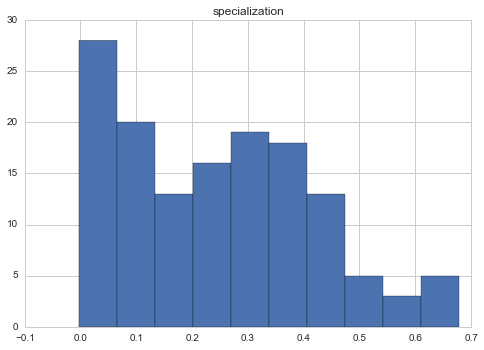

In [5]:
table.hist("specialization")

### links x specialization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1157d04d0>]], dtype=object)

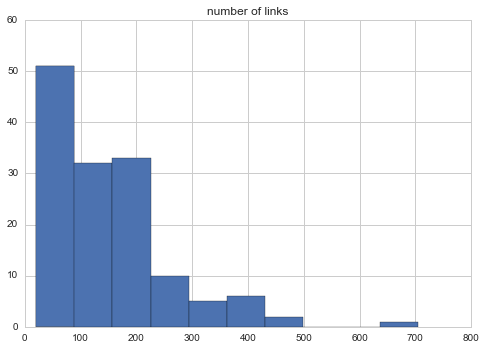

In [6]:
table.hist("number of links")

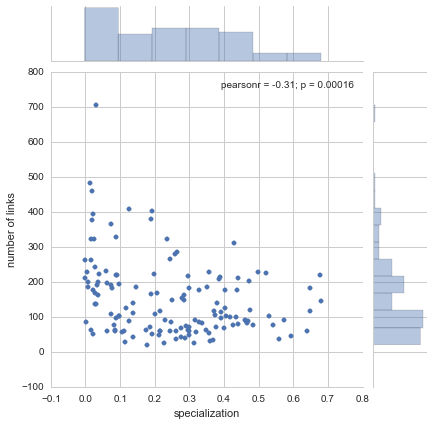

In [7]:
sns.jointplot(table.specialization, table["number of links"])

## quality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115cd3150>]], dtype=object)

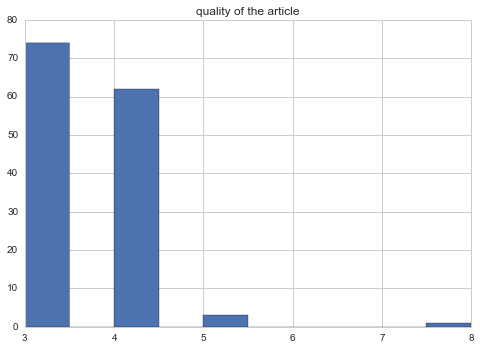

In [8]:
table.hist("quality of the article")

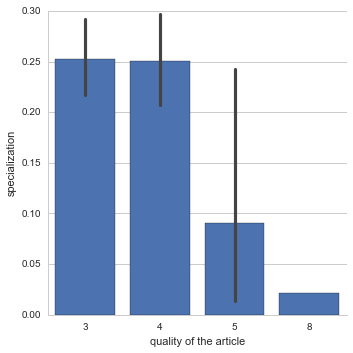

In [9]:
g = sns.factorplot("quality of the article", "specialization", data=table, kind="bar")
#g.despine()

g
#sns.jointplot(table.specialization, table["quality of the article"])

## word lengths

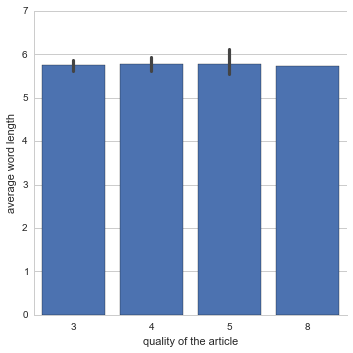

In [10]:
g = sns.factorplot("quality of the article", "average word length", data=table, kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11610cd90>]], dtype=object)

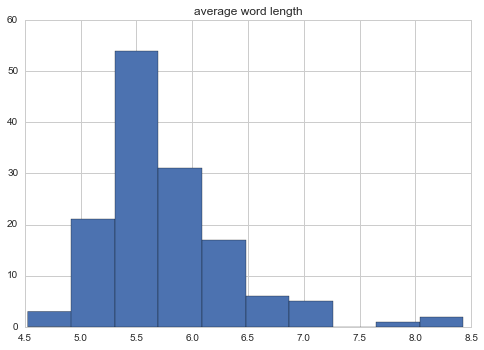

In [11]:
table.hist("average word length")

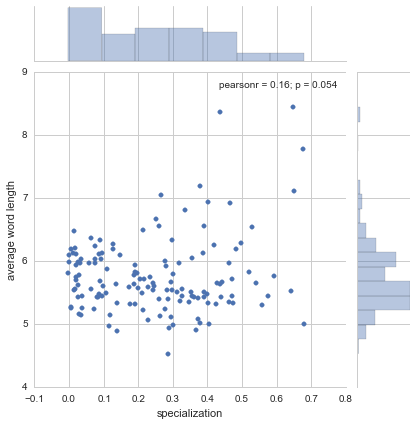

In [19]:
sns.jointplot(table.specialization, table["average word length"])

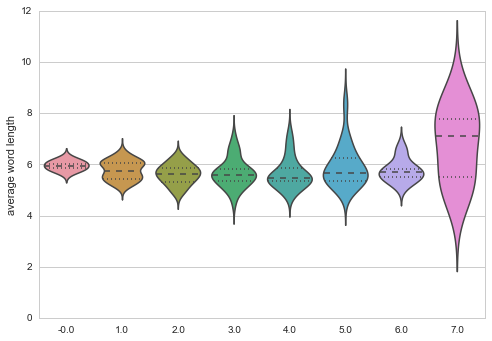

In [38]:
sns.violinplot(table["average word length"], [ math.ceil(x * 10) for x in table["specialization"]])

## length x revisions

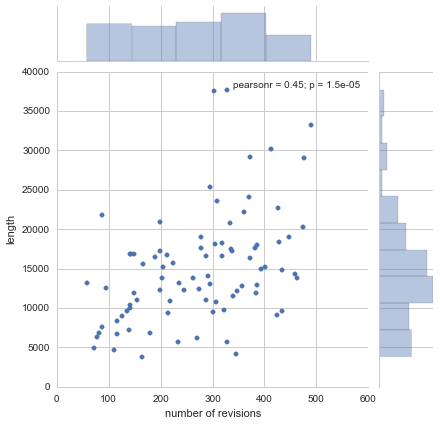

In [16]:
sns.jointplot("number of revisions", "length", data=table[table["number of revisions"] < 500])